<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão logistica**

## **Conceitos importantes**

Antes de partirmos para a regressão propriamente dita, vamos relembrar alguns pontos sobre a regressão linear.

**Regressão Linear**:

- Definição:

  - **A regressão linear** é um método estatístico usado para modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou características).

- Objetivo:

  - O objetivo da regressão linear é prever valores contínuos com base em uma relação linear entre as características e a variável de destino.

- Exemplo:

  - Um exemplo comum de regressão linear é prever o preço de uma casa com base em características como área, número de quartos, localização, etc.

- Saída:

  - A saída de um modelo de regressão linear é um valor contínuo. Por exemplo, o preço previsto de uma casa em dólares.

Agora vamos observar alguns pontos sobre a classificação.

**Classificação**:
- Definição:

  - **A classificação** é um tipo de algoritmo de aprendizado de máquina supervisionado usado para prever a classe de um objeto com base em suas características.
- Objetivo:

  - O objetivo da classificação é separar os pontos de dados em diferentes categorias ou classes usando uma linha reta (ou plano) no espaço de características.

- Exemplo:

  - Um exemplo comum de classificação linear é a classificação de flores em diferentes espécies com base em características como comprimento e largura das pétalas e sépalas.

- Saída:

  - A saída de um modelo de classificação é uma classe ou categoria discreta. Por exemplo, "espécie 1", "espécie 2", etc.



Dessa forma, podemos observar que são técnicas bem distintas uma da outra, partindo desde o seu objetivo até a sua saída.

## **Prática**

Agora que já revisamos e entendemos um pouco mais sobre classificação, vamos aplicar na prática. Para isso, como de costume, vamos importar nossas bibliotecas e nossos dados.

Importante frisar que vamos utilizar uma base de dados referentes ao câncer de mama. Portanto, teremos algumas variáveis, como o tipo do nódulo, informando se ele é benigno ou maligno, tamanho do nódulo, e assim por diante.

### **Carregando os dados**

In [1]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
import scipy.stats

# Machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

Agora que já importamos todas as bibliotecas necessárias, vamos importar a base de dados propriamente dita.

In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/data_classificacao.csv', index_col=0)

Agora que já carregamos a base de dados, vamos ter um primeiro contato com esses dados.

In [5]:
# Observando os primeiros registros
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Vemos diversas variáveis aqui, que até o momento não sabemos do que se trata. Então, vamos observar o dicionário de dados.


- **id**: Identificação de cada registro na base
- **diagnóstico**: Identificando o tipo de nódulo (M = maligno, B = benigno)

*Colunas 3 a 32*

Dez características de valor real são computadas para cada núcleo celular:

* **raio**: distância do centro aos pontos do perímetro
* **textura**: desvio padrão dos valores da escala de cinza
* **perímetro**: comprimento total da linha que forma a borda do objeto
* **área**: quantidade de espaço dentro dos limites do objeto
* **suavidade**: variação local nos comprimentos dos raios
* **compactação**: perímetro^2 / área - 1,0
* **concavidade**: severidade das porções côncavas do contorno
* **pontos côncavos**: número de porções côncavas do contorno
* **simetria**: medida de quanto um objeto é semelhante a si mesmo após uma transformação
* **dimensão fractal**: "aproximação da costa" - 1





Agora que já entendemos um pouco melhor nossos dados, vamos observar o tipo de cada variável para gerarmos um entendimento mais completo dos mesmos.

In [ ]:
# Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

Podemos observar que, com exceção da variável 'diagnosis', que neste caso é do tipo categórica, pois possui duas classes, o restante das variáveis são todas do tipo 'float'.

Agora vamos observar mais detalhadamente a variável 'diagnosis', já que ela é nossa variável alvo.

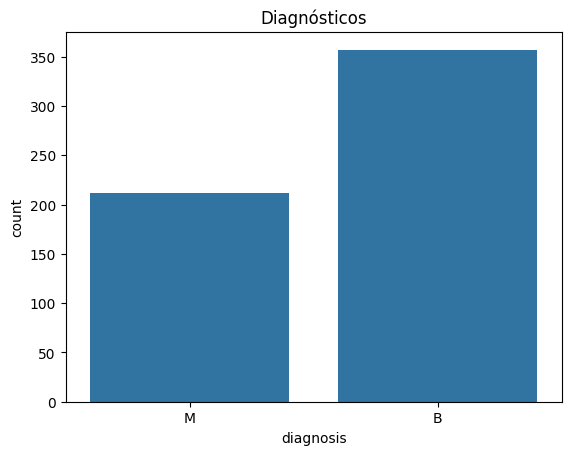

In [7]:
# Criando o gráfico
sns.countplot(data = df, x = 'diagnosis')
plt.title('Diagnósticos')

# Exibindo o gráfico
plt.show()

Dessa forma, podemos observar que a maior parte dos registros na variável 'diagnóstico' é 'B', que representa benigno. É evidente a discrepância entre esses valores, logo podemos assumir que os dados nessa variável estão desbalanceados.

Vamos observar um pouco mais a fundo.

In [18]:
# Calculando a porcentagem de ocorrências de 'm' em 'diagnosis'
percent_m = round((df['diagnosis'] == 'M').sum() / len(df['diagnosis']) * 100, 2)

# Calculando a porcentagem de ocorrências de 'b' em 'diagnosis'
percent_b = round((df['diagnosis'] == 'B').sum() / len(df['diagnosis']) * 100, 2)

# Calculando o total de diagnósticos
total_diag = len(df['diagnosis'])

# Exibindo a porcentagem
print(f"Total de diagnósticos: {total_diag}\nPorcentagem de diagnósticos benignos: {percent_b}%\nPorcentagem de diagnósticos malignos: {percent_m}%")

Total de diagnósticos: 569
Porcentagem de diagnósticos benignos: 62.74%
Porcentagem de diagnósticos malignos: 37.26%


Como mencionado anteriormente, nossa variável está bastante desbalanceada. Dos 569 diagnósticos, 62,74%, ou seja, 357 deles, são benignos, enquanto os outros 37,26%, representando cerca de 212 registros, são malignos.

Importante destacar que ao analisarmos nosso modelo, não podemos usar a acurácia como uma métrica precisa, já que os dados de nossa variável alvo não estão balanceados.